In [52]:
!pip install plotly==4.5.2

In [175]:
# Importation of useful libraries
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

import random 
import datetime as dt
import re

from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, classification_report
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import os

In [57]:
data = pd.read_csv('/content/data.csv', encoding="ISO-8859-1")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [59]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [60]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [61]:
data[data['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [62]:
data[data['Description'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [63]:
data[data['Description'].isna()].shape

(1454, 8)

In the Description column, if it has NaN value then give 0 value to UnitPrice

In [64]:
data[data['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


And we see if description has NaN value it give 0 value for unit price.

In [65]:
data[data['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [66]:
data['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In UnitPrice we have value < 0

In [67]:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [68]:
data = data[data['UnitPrice']>=0]
data = data[data['Quantity']>=0]

In [69]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

In [70]:
data[data['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [71]:
data = data.dropna(subset={'CustomerID'})

In [72]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Finishing for drop na.
Then, find duplicates value.

In [73]:
print(f'Total duplicated entry: {data.duplicated().sum()}')

Total duplicated entry: 5192


In [74]:
data = data[data.duplicated()==False]
print(f'Total duplicated entry after cleaning: {data.duplicated().sum()}')

Total duplicated entry after cleaning: 0


In [75]:
data = data.astype({'CustomerID':str})

#Exploratory Analysis

Find the most selling

In [76]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

#Find most customer country

In [77]:
customer_top10 = data.groupby('Country')['CustomerID'].count().sort_values(ascending=False).reset_index().head(10)
customer_top10

,Country,CustomerID
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1453
9,Australia,1184


In [78]:
fig = px.bar(customer_top10, x=customer_top10['CustomerID'], y=customer_top10['Country'], orientation='h', color=customer_top10['Country'], title='Top 15 Customer')
fig.show()

In [79]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=customer_top10['Country'], values=customer_top10['CustomerID']))
fig.show()

And we see 90.7% customers are from United Kingdom

#Find Most Selling Country

In [80]:
country = data.groupby('Country')['Quantity'].sum().reset_index()
country = country.sort_values(['Quantity'], ascending=False).reset_index(drop=True)

In [81]:
top10_country = country[0:10]
top10_country

,Country,Quantity
0,United Kingdom,4254037
1,Netherlands,200937
2,EIRE,140383
3,Germany,119156
4,France,111429
5,Australia,84199
6,Sweden,36078
7,Switzerland,30083
8,Spain,27944
9,Japan,26016


In [82]:
fig = px.bar(top10_country, y=top10_country['Country'], x=top10_country['Quantity'], color=top10_country['Country'], text='Quantity', orientation='h', title='Top 15 Selling')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [83]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=top10_country['Country'], values=top10_country['Quantity']))
fig.show()

Here we see 84.6% items are selling to United Kingdom

#Find Most Selling Value Country

In [84]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [85]:
top_15 = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index().head(15)
top_15

,Country,TotalPrice
0,United Kingdom,7.285025e+06
1,Netherlands,2.854463e+05
2,EIRE,2.652625e+05
3,Germany,2.286784e+05
4,France,2.089343e+05
5,Australia,1.384538e+05
6,Spain,6.155856e+04
7,Switzerland,5.644395e+04
8,Belgium,4.119634e+04
9,Sweden,3.836783e+04


In [86]:
fig = px.bar(top_15, x = top_15['TotalPrice'], y=top_15['Country'], text='TotalPrice', orientation='h', color=top_15['Country'], title='Top 15 Most Total Gross Amount Sales')
fig.show()

In [87]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=top_15['Country'], values=top_15['TotalPrice']))
fig.show()

Here we see 83.2% total gross amount sales to United Kingdom

#RFM Analysis for Customer Segmentation

Recency

In [88]:
data['Date'] = data['InvoiceDate'].apply(lambda x: x.date())
data.drop(columns='InvoiceDate', inplace=True)
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [89]:
recency = data.groupby('CustomerID')['Date'].max().reset_index()
recency.columns = ['CustomerID', 'LastPurcashed']
recency.head()

,CustomerID,LastPurcashed
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [90]:
now = dt.date(2021,8,13)
print(now)

2021-08-13


In [91]:
recency['Recency'] = recency['LastPurcashed'].apply(lambda x : (now - x).days)
recency.drop(columns='LastPurcashed', inplace=True)

In [92]:
recency.head()

,CustomerID,Recency
0,12346.0,3860
1,12347.0,3537
2,12348.0,3610
3,12349.0,3553
4,12350.0,3845


Frequency

In [93]:
frequency = data.drop_duplicates(['InvoiceNo', 'CustomerID'], keep='first')
frequency = frequency.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


Monetary

In [94]:
monetary = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [95]:
rfm = recency.merge(frequency, on='CustomerID')
rfm = rfm.merge(monetary, on='CustomerID')
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,3860,1,77183.60
1,12347.0,3537,7,4310.00
2,12348.0,3610,4,1797.24
3,12349.0,3553,1,1757.55
4,12350.0,3845,1,334.40


In [96]:
rfm.set_index('CustomerID', inplace=True)

In [97]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4339 non-null   int64  
 1   Frequency  4339 non-null   int64  
 2   Monetary   4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6+ KB


#Create RFM Tables

In [98]:
rfm_class = rfm
rfm_class['recency_score'] = pd.qcut(rfm_class['Recency'],5,labels=[5,4,3,2,1])
rfm_class['frequency_score'] = pd.qcut(rfm_class['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_class['monetary_score'] = pd.qcut(rfm_class['Monetary'],5,labels=[1,2,3,4,5])
rfm_class['RFM_SCORE'] = (rfm_class['recency_score'].astype(str)+ rfm_class['frequency_score'].astype(str))

rfm_class.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12346.0,3860,1,77183.60,1,1,5,11
12347.0,3537,7,4310.00,5,5,5,55
12348.0,3610,4,1797.24,2,4,4,24
12349.0,3553,1,1757.55,4,1,4,41
12350.0,3845,1,334.40,1,1,2,11


Top Customer for Highest Monetary

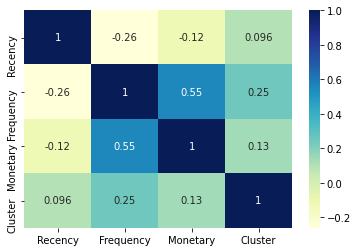

In [182]:
sns.heatmap(rfm_class.corr(),cmap="YlGnBu",annot=True)

In [100]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm_class['segment'] = rfm_class['RFM_SCORE'].replace(seg_map, regex=True)
rfm_class.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12346.0,3860,1,77183.60,1,1,5,11,hibernating
12347.0,3537,7,4310.00,5,5,5,55,champions
12348.0,3610,4,1797.24,2,4,4,24,at_Risk
12349.0,3553,1,1757.55,4,1,4,41,promising
12350.0,3845,1,334.40,1,1,2,11,hibernating


In [101]:
customer_segment = pd.DataFrame(rfm_class['segment'].value_counts())
customer_segment = customer_segment.reset_index()
customer_segment.columns = ['segment','count']
customer_segment

,segment,count
0,hibernating,1071
1,loyal_customers,819
2,champions,633
3,at_Risk,593
4,potential_loyalists,484
5,about_to_sleep,352
6,need_attention,187
7,promising,95
8,cant_loose,63
9,new_customers,42


In [105]:
#visualisasi
fig = px.treemap(customer_segment, path = ['segment'] , values='count') #membutuhkan update untuk treemap ke plotly 4.5.2
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(title='Customer Segmentation')
fig.show()

#RFM Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



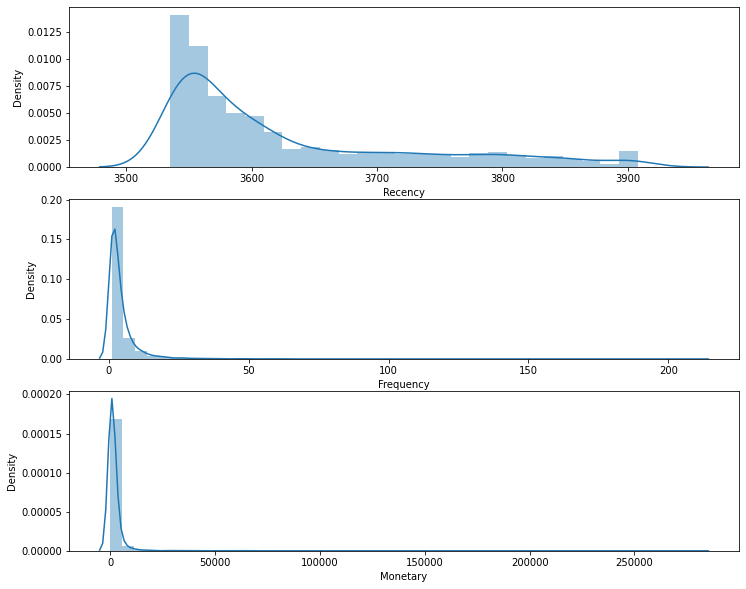

In [120]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm_class['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm_class['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm_class['Monetary'])
# Show the plot
plt.show()

In [121]:
 fig = px.bar(customer_segment, x=customer_segment['count'].sort_values(ascending=False), 
              y='segment', orientation='h', color=customer_segment['segment'],
              text='count', title='Customer Segmentation')
 fig.update(layout_coloraxis_showscale=False)
 fig.show()

#K-Means Segmentation

In [139]:
k_clustering = rfm_class[['recency_score', 'frequency_score', 'monetary_score']].copy()
k_clustering

,recency_score,frequency_score,monetary_score
CustomerID,,,
12346.0,1,1,5
12347.0,5,5,5
12348.0,2,4,4
12349.0,4,1,4
12350.0,1,1,2
...,...,...,...
18280.0,1,2,1
18281.0,1,2,1
18282.0,5,3,1


In [140]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(k_clustering)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2
0,-1.420183,-1.414051,1.414051
1,1.410723,1.414051,1.414051
2,-0.712457,0.707025,0.707025
3,0.702996,-1.414051,0.707025
4,-1.420183,-1.414051,-0.707025


#Elbow to find n_clusters


In [151]:
elbow = []
for i in range (1, 15):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
  kmeans.fit(data_scaled)
  labels = kmeans.labels_ 
  elbow.append(kmeans.inertia_)

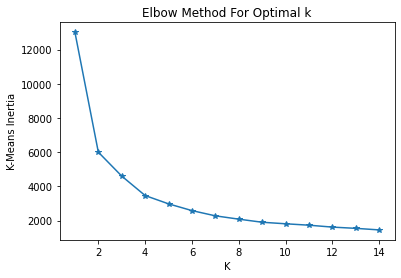

In [143]:
plt.plot(range(1,15), elbow, marker="*")
plt.xlabel('K')
plt.ylabel('K-Means Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

from this picture, we see n_cluster = 4

In [153]:
for num in range(2,16):
    clusters = KMeans(n_clusters=num,random_state=0)
    labels = clusters.fit_predict(data_scaled)
    
    sil_avg = silhouette_score(data_scaled, labels)
    print('For',num,'The Silhouette Score is =',sil_avg)

For 2 The Silhouette Score is = 0.4483464596833928
For 3 The Silhouette Score is = 0.37981328887087595
For 4 The Silhouette Score is = 0.38213684929635106
For 5 The Silhouette Score is = 0.3672225855863927
For 6 The Silhouette Score is = 0.3601319223330312
For 7 The Silhouette Score is = 0.37155889435681316
For 8 The Silhouette Score is = 0.3646525679047607
For 9 The Silhouette Score is = 0.3549383833177952
For 10 The Silhouette Score is = 0.36321401386782387
For 11 The Silhouette Score is = 0.3532802244294943
For 12 The Silhouette Score is = 0.3516270481233252
For 13 The Silhouette Score is = 0.3649302093037344
For 14 The Silhouette Score is = 0.37306706846252974
For 15 The Silhouette Score is = 0.394388647109856


We observe from the elbow plot a sharp bend after the number of clusters increase by 2. Silhoutte Score is also the highest for 2 clusters.

But, there is also a significant reduce in cluster error as number of clusters increase from 2 to 6 and after 6, the reduction is not much.

So, we will choose n_clusters = 6 to properly segment our customers.

#K-Means with n_clusters = 6

In [154]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [155]:
from sklearn.metrics import silhouette_score
score = silhouette_score (data_scaled, kmeans.labels_)
print("Score = ", score)

Score =  0.3621353649981402


In [163]:
k_clustering['Cluster'] = pred
temp = k_clustering['Cluster']
rfm_class = rfm_class.join(temp)
rfm_class

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment,Cluster
CustomerID,,,,,,,,,
12346.0,3860,1,77183.60,1,1,5,11,hibernating,2
12347.0,3537,7,4310.00,5,5,5,55,champions,5
12348.0,3610,4,1797.24,2,4,4,24,at_Risk,0
12349.0,3553,1,1757.55,4,1,4,41,promising,1
12350.0,3845,1,334.40,1,1,2,11,hibernating,4
...,...,...,...,...,...,...,...,...,...
18280.0,3812,1,180.60,1,2,1,12,hibernating,4
18281.0,3715,1,80.82,1,2,1,12,hibernating,4
18282.0,3542,2,178.05,5,3,1,53,potential_loyalists,1


In [165]:
rfm_class.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,3611.604278,5.351159,2544.932460
1,3570.157447,1.341844,296.264709
2,3675.880364,2.152146,934.296518
3,3549.606481,3.385802,1299.823860
4,3761.224917,1.099228,240.265624
5,3546.507343,13.006676,7305.680053


#**Decision Tree Classifier**

In [176]:
X = k_clustering.drop(columns='Cluster')
Y = k_clustering['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# instantiate the model
dc=DecisionTreeClassifier()
knn=KNeighborsClassifier(1)
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[168   0   0   0   0   0]
 [  0 204   0   8   0   0]
 [ 32   1 198   0   0   0]
 [  0   4   0 190   0   0]
 [  0   0   0   0 272   0]
 [  0   0   0   0   0 225]]


Accuracy of DecisionTreeClassifier: 96.54377880184332 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       168
           1       0.98      0.96      0.97       212
           2       1.00      0.86      0.92       231
           3       0.96      0.98      0.97       194
           4       1.00      1.00      1.00       272
           5       1.00      1.00      1.00       225

    accuracy                           0.97      1302
   macro avg       0.96      0.97      0.96      1302
weighted avg       0.97      0.97      0.97      1302



In [177]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dt_predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[168   0   0   0   0   0]
 [  0 204   0   8   0   0]
 [ 32   1 198   0   0   0]
 [  0   4   0 190   0   0]
 [  0   0   0   0 272   0]
 [  0   0   0   0   0 225]]

True Positives(TP) =  168

True Negatives(TN) =  204

False Positives(FP) =  0

False Negatives(FN) =  0


#**KNN**

In [178]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[166   0   2   0   0   0]
 [  0 211   1   0   0   0]
 [  0   0 231   0   0   0]
 [  0   1   0 193   0   0]
 [  0   0   0   0 272   0]
 [  0   0   0   0   0 225]]


Accuracy of K-NeighborsClassifier: 99.69278033794163 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       168
           1       1.00      1.00      1.00       212
           2       0.99      1.00      0.99       231
           3       1.00      0.99      1.00       194
           4       1.00      1.00      1.00       272
           5       1.00      1.00      1.00       225

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302



In [179]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn_predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[166   0   2   0   0   0]
 [  0 211   1   0   0   0]
 [  0   0 231   0   0   0]
 [  0   1   0 193   0   0]
 [  0   0   0   0 272   0]
 [  0   0   0   0   0 225]]

True Positives(TP) =  166

True Negatives(TN) =  211

False Positives(FP) =  0

False Negatives(FN) =  0


#**Gaussian Naive Bayes Classifier**

In [180]:
m2 = 'Naive Bayes'
gnb.fit(X_train,y_train)
nbpred = gnb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[163   0   5   0   0   0]
 [  0 200  12   0   0   0]
 [  0   0 231   0   0   0]
 [  0   0   0 194   0   0]
 [  0   0  10   0 262   0]
 [  0   0   0  12   0 213]]


Accuracy of Naive Bayes model: 97.00460829493088 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       168
           1       1.00      0.94      0.97       212
           2       0.90      1.00      0.94       231
           3       0.94      1.00      0.97       194
           4       1.00      0.96      0.98       272
           5       1.00      0.95      0.97       225

    accuracy                           0.97      1302
   macro avg       0.97      0.97      0.97      1302
weighted avg       0.97      0.97      0.97      1302



In [181]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,nbpred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[163   0   5   0   0   0]
 [  0 200  12   0   0   0]
 [  0   0 231   0   0   0]
 [  0   0   0 194   0   0]
 [  0   0  10   0 262   0]
 [  0   0   0  12   0 213]]

True Positives(TP) =  163

True Negatives(TN) =  200

False Positives(FP) =  0

False Negatives(FN) =  0


**Conclusion:**

We saw that using classification models like Logisitc Regression, KNeighborsClassifier, DecisionTree, we predicted the clusters for customers using the RFM dataset as the independent variable and cluster as the target variable. The clusters predicted by the classification models match perfectly with KMeans clustering. that our groups are right.